##  Google Stock Prediction usnig LSTM 

<img src="Screenshot 2024-06-24 015130.jpg " />

## Introduction
### Predicting Google stock prices using LSTM. In this project, we'll leverage the power of deep learning to forecast stock prices based on historical data.


## Tasks in this project
*  Importing necessary libraries
*  Loading and preparing the dataset
*  Data preprocessing and normalization
*  Generating sequences for training
*  Constructing the LSTM model architecture
*  Compiling and training the model
*  Visualizing predictions on training data
*  Predicting stock prices for the next 10 days

## <span style="color: #d62d20;">Importing necessary libraries</span>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pi
import plotly.express as px
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')

In [32]:
# Step 1
from datetime import datetime
from sklearn import preprocessing
from sklearn import metrics 
import tensorflow as tf
from tensorflow import keras
import joblib

df2=stock

## <span style="color: #d62d20">Load Stock Data</span>

Load the stock data from the provided CSV file

In [2]:
stock_data = pd.read_csv(r'C:\Users\islam\Downloads\AI Work\Google Stock RNN -LSTM Forcasting Model\GOOG.csv')

In [3]:
stock_data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


## <span style="color: #d62d20">Data Ovreview</span>

In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [5]:
stock_data.describe().T

,count,mean,std,min,25%,50%,75%,max
close,1258.0,1.216317e+03,383.333358,668.260,9.608025e+02,1132.460,1.360595e+03,2521.60
high,1258.0,1.227431e+03,387.570872,672.300,9.687575e+02,1143.935,1.374345e+03,2526.99
low,1258.0,1.204176e+03,378.777094,663.284,9.521825e+02,1117.915,1.348557e+03,2498.29
open,1258.0,1.215261e+03,382.446995,671.000,9.590050e+02,1131.150,1.361075e+03,2524.92
volume,1258.0,1.601590e+06,696017.226844,346753.000,1.173522e+06,1412588.500,1.812156e+06,6207027.00
adjClose,1258.0,1.216317e+03,383.333358,668.260,9.608025e+02,1132.460,1.360595e+03,2521.60
adjHigh,1258.0,1.227431e+03,387.570873,672.300,9.687575e+02,1143.935,1.374345e+03,2526.99
adjLow,1258.0,1.204176e+03,378.777099,663.284,9.521825e+02,1117.915,1.348557e+03,2498.29
adjOpen,1258.0,1.215261e+03,382.446995,671.000,9.590050e+02,1131.150,1.361075e+03,2524.92
adjVolume,1258.0,1.601590e+06,696017.226844,346753.000,1.173522e+06,1412588.500,1.812156e+06,6207027.00


### Cheack The Void cells (Nulls)

In [6]:
stock_data.isna().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

## <span style="color: #d62d20">Data Visualization</span>


In [7]:
fig = px.line(stock_data, x='date', y='volume', title='Daily Trading Volume')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Volume')
fig.update_layout(template='plotly_dark')
fig.show()

In [8]:
fig = px.line(stock_data, x='date', y='close', title='Closing Prices Over Time')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Closing Price')
fig.update_layout(template='plotly_dark')
fig.show()

In [9]:
fig.add_trace(go.Scatter(x=stock_data['date'], y=stock_data['open'], mode='lines+markers', name='Open'))
fig.add_trace(go.Scatter(x=stock_data['date'], y=stock_data['high'], mode='lines+markers', name='High'))
fig.add_trace(go.Scatter(x=stock_data['date'], y=stock_data['low'], mode='lines+markers', name='Low'))
fig.add_trace(go.Scatter(x=stock_data['date'], y=stock_data['close'], mode='lines+markers', name='Close'))

fig.update_layout(title='Stock Price Analysis',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()

In [10]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

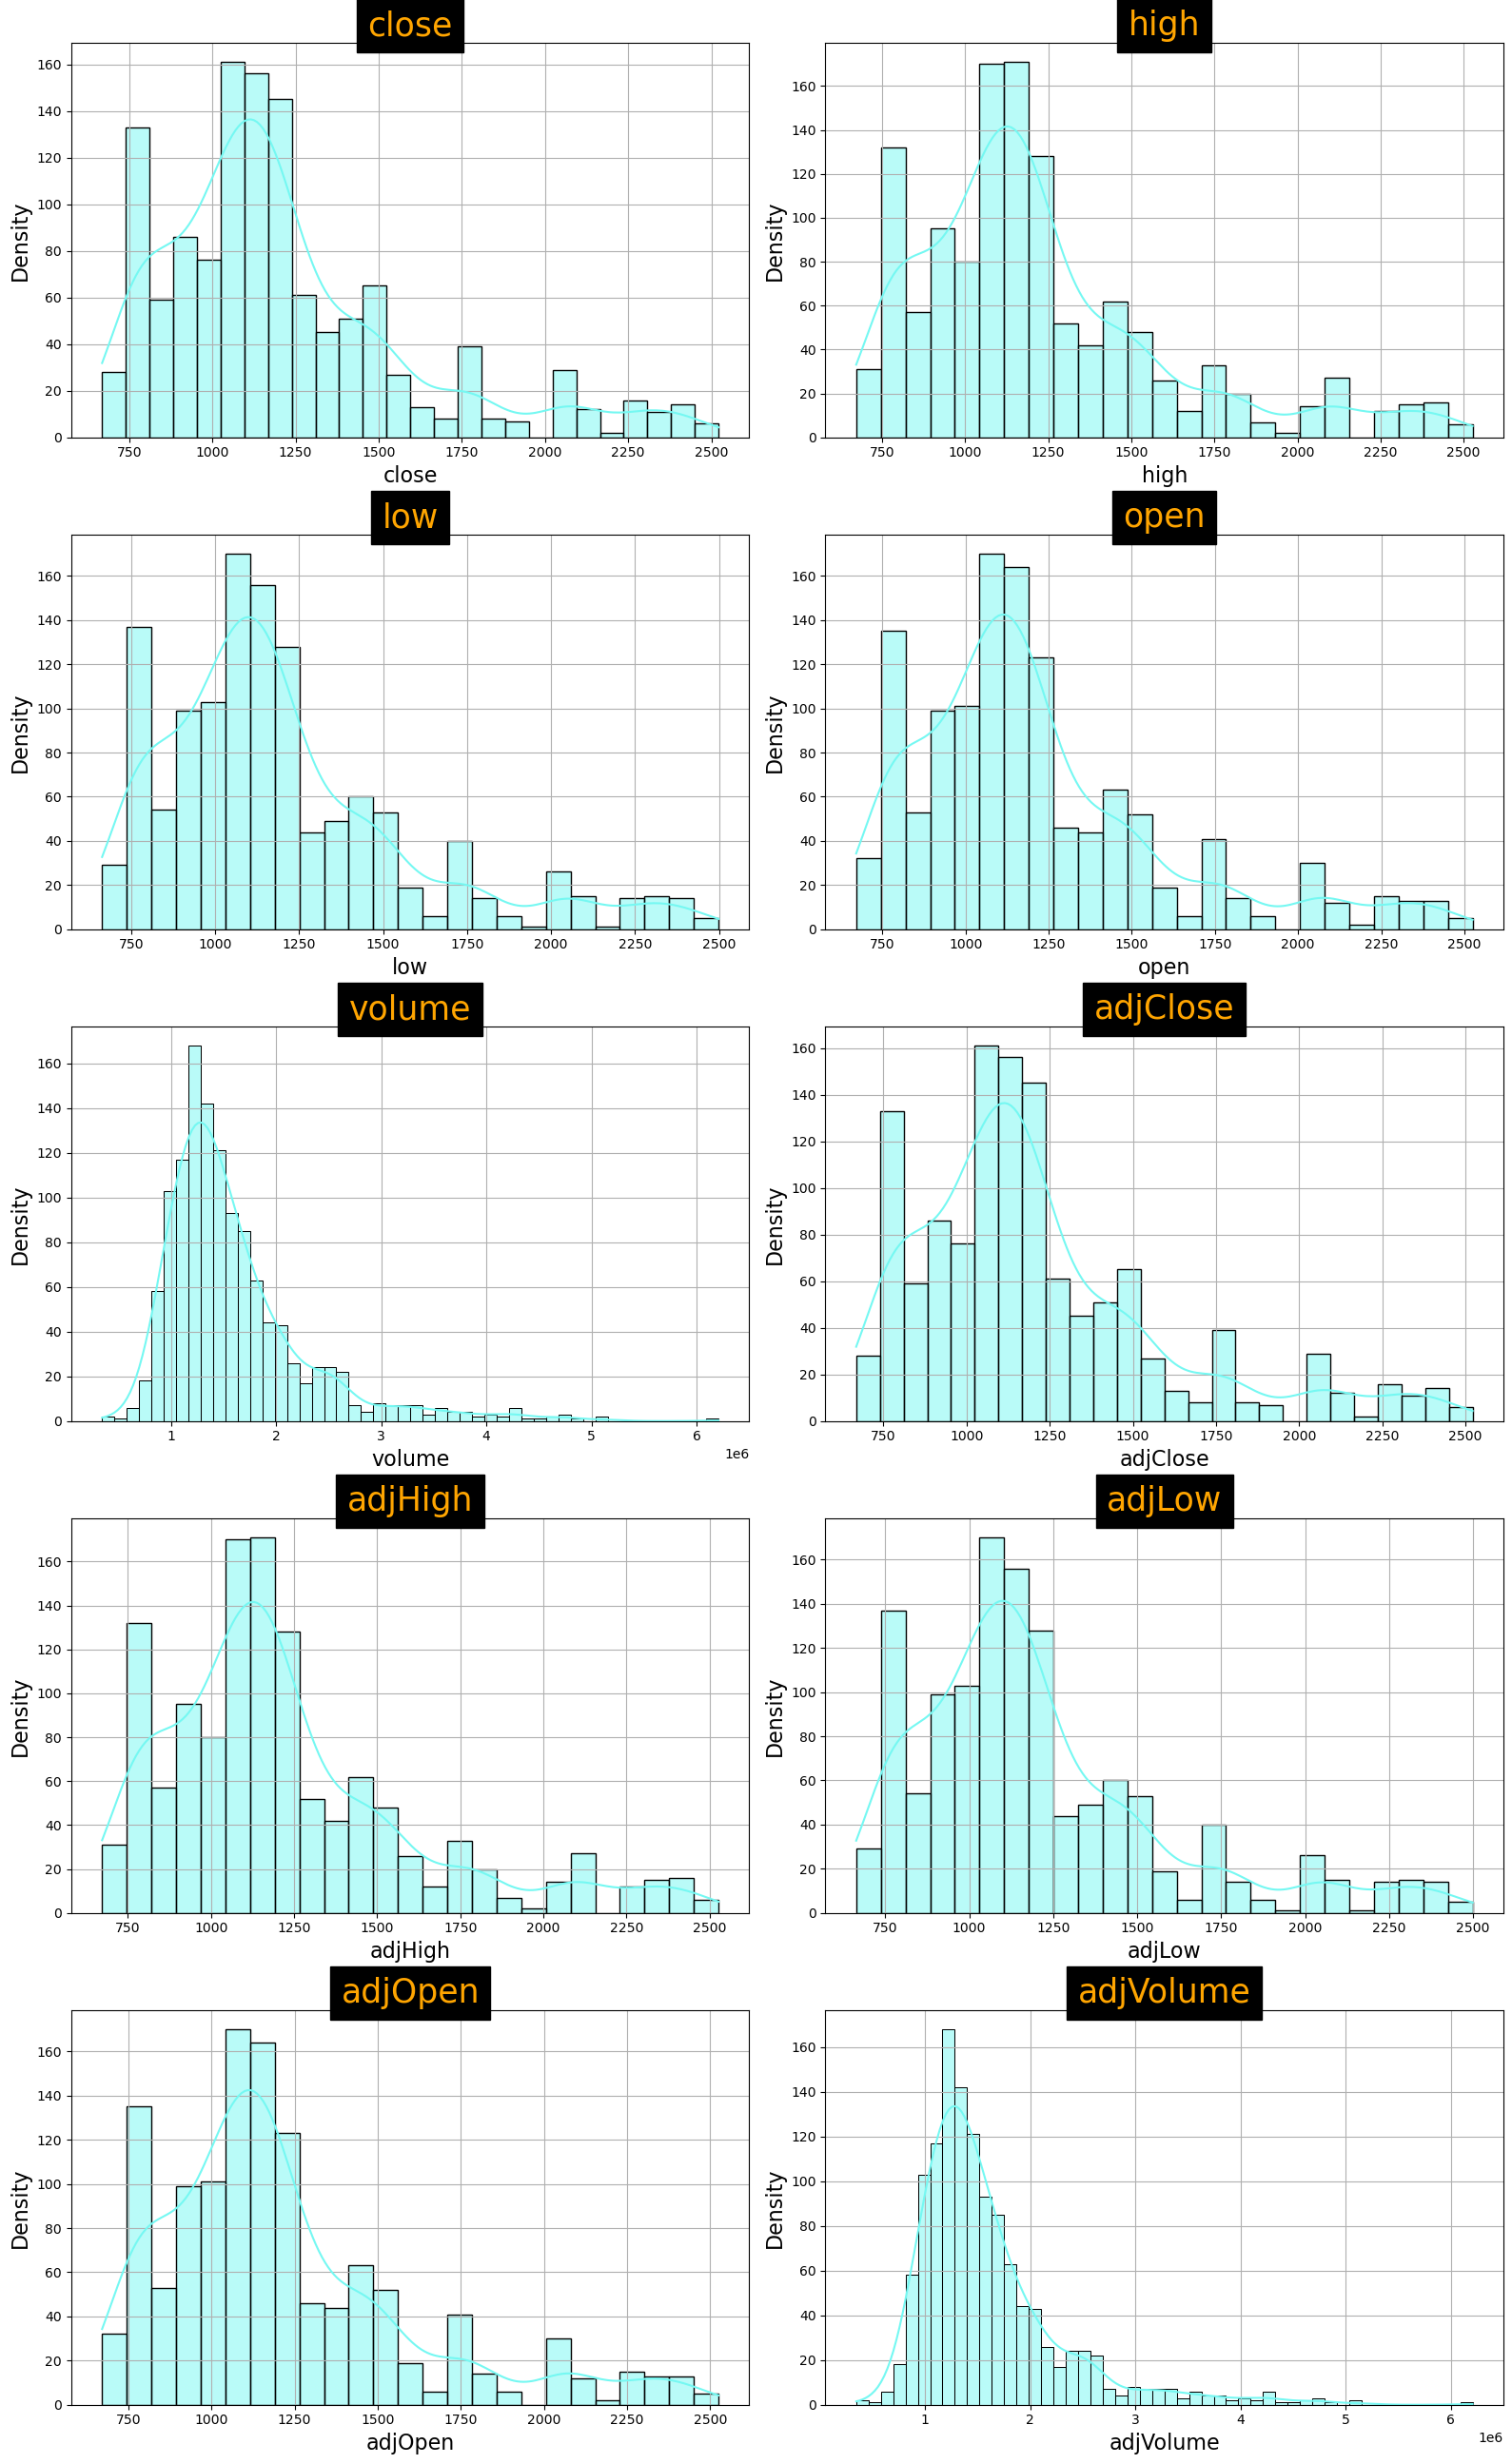

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume']

plt.figure(figsize=(16,26))
for idx, column in enumerate(features): 
    plt.subplot(5, 2, idx + 1)
    sns.histplot(stock_data, x=column, kde=True, color='#75f8f2')
    plt.title(column, backgroundcolor='black', color='orange', fontsize=25)
    plt.xticks()
    plt.xlabel(column, fontsize=16)
    plt.ylabel('Density', fontsize=16)
    plt.grid()

plt.tight_layout()
plt.show()


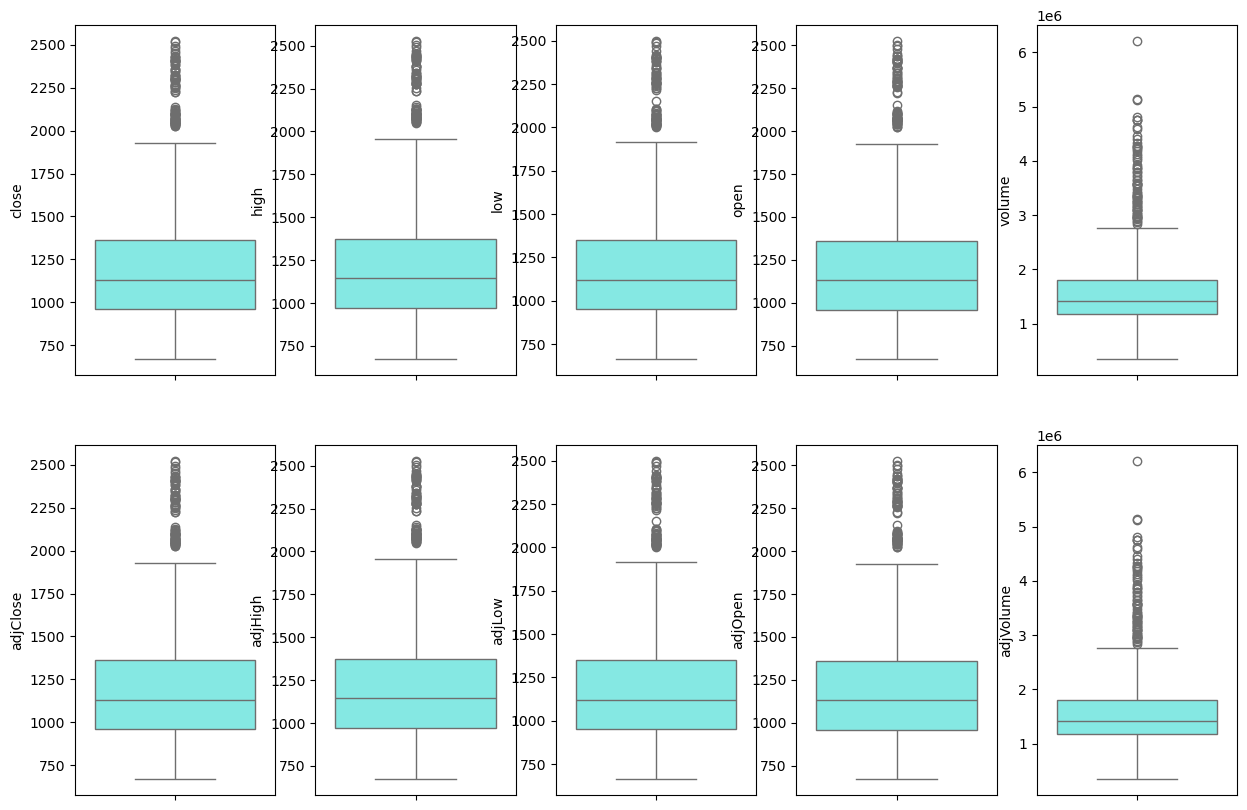

In [12]:
# Subplot
import seaborn as sns
features = ['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume']
fig  = plt.subplots(nrows = 3, ncols = 3,figsize = (15,10))
for i in range(len(features)) :
    plt.subplot(2,5,i+1)
    ax = sns.boxplot(stock_data[features[i]], color="#75f8f2")

plt.show()

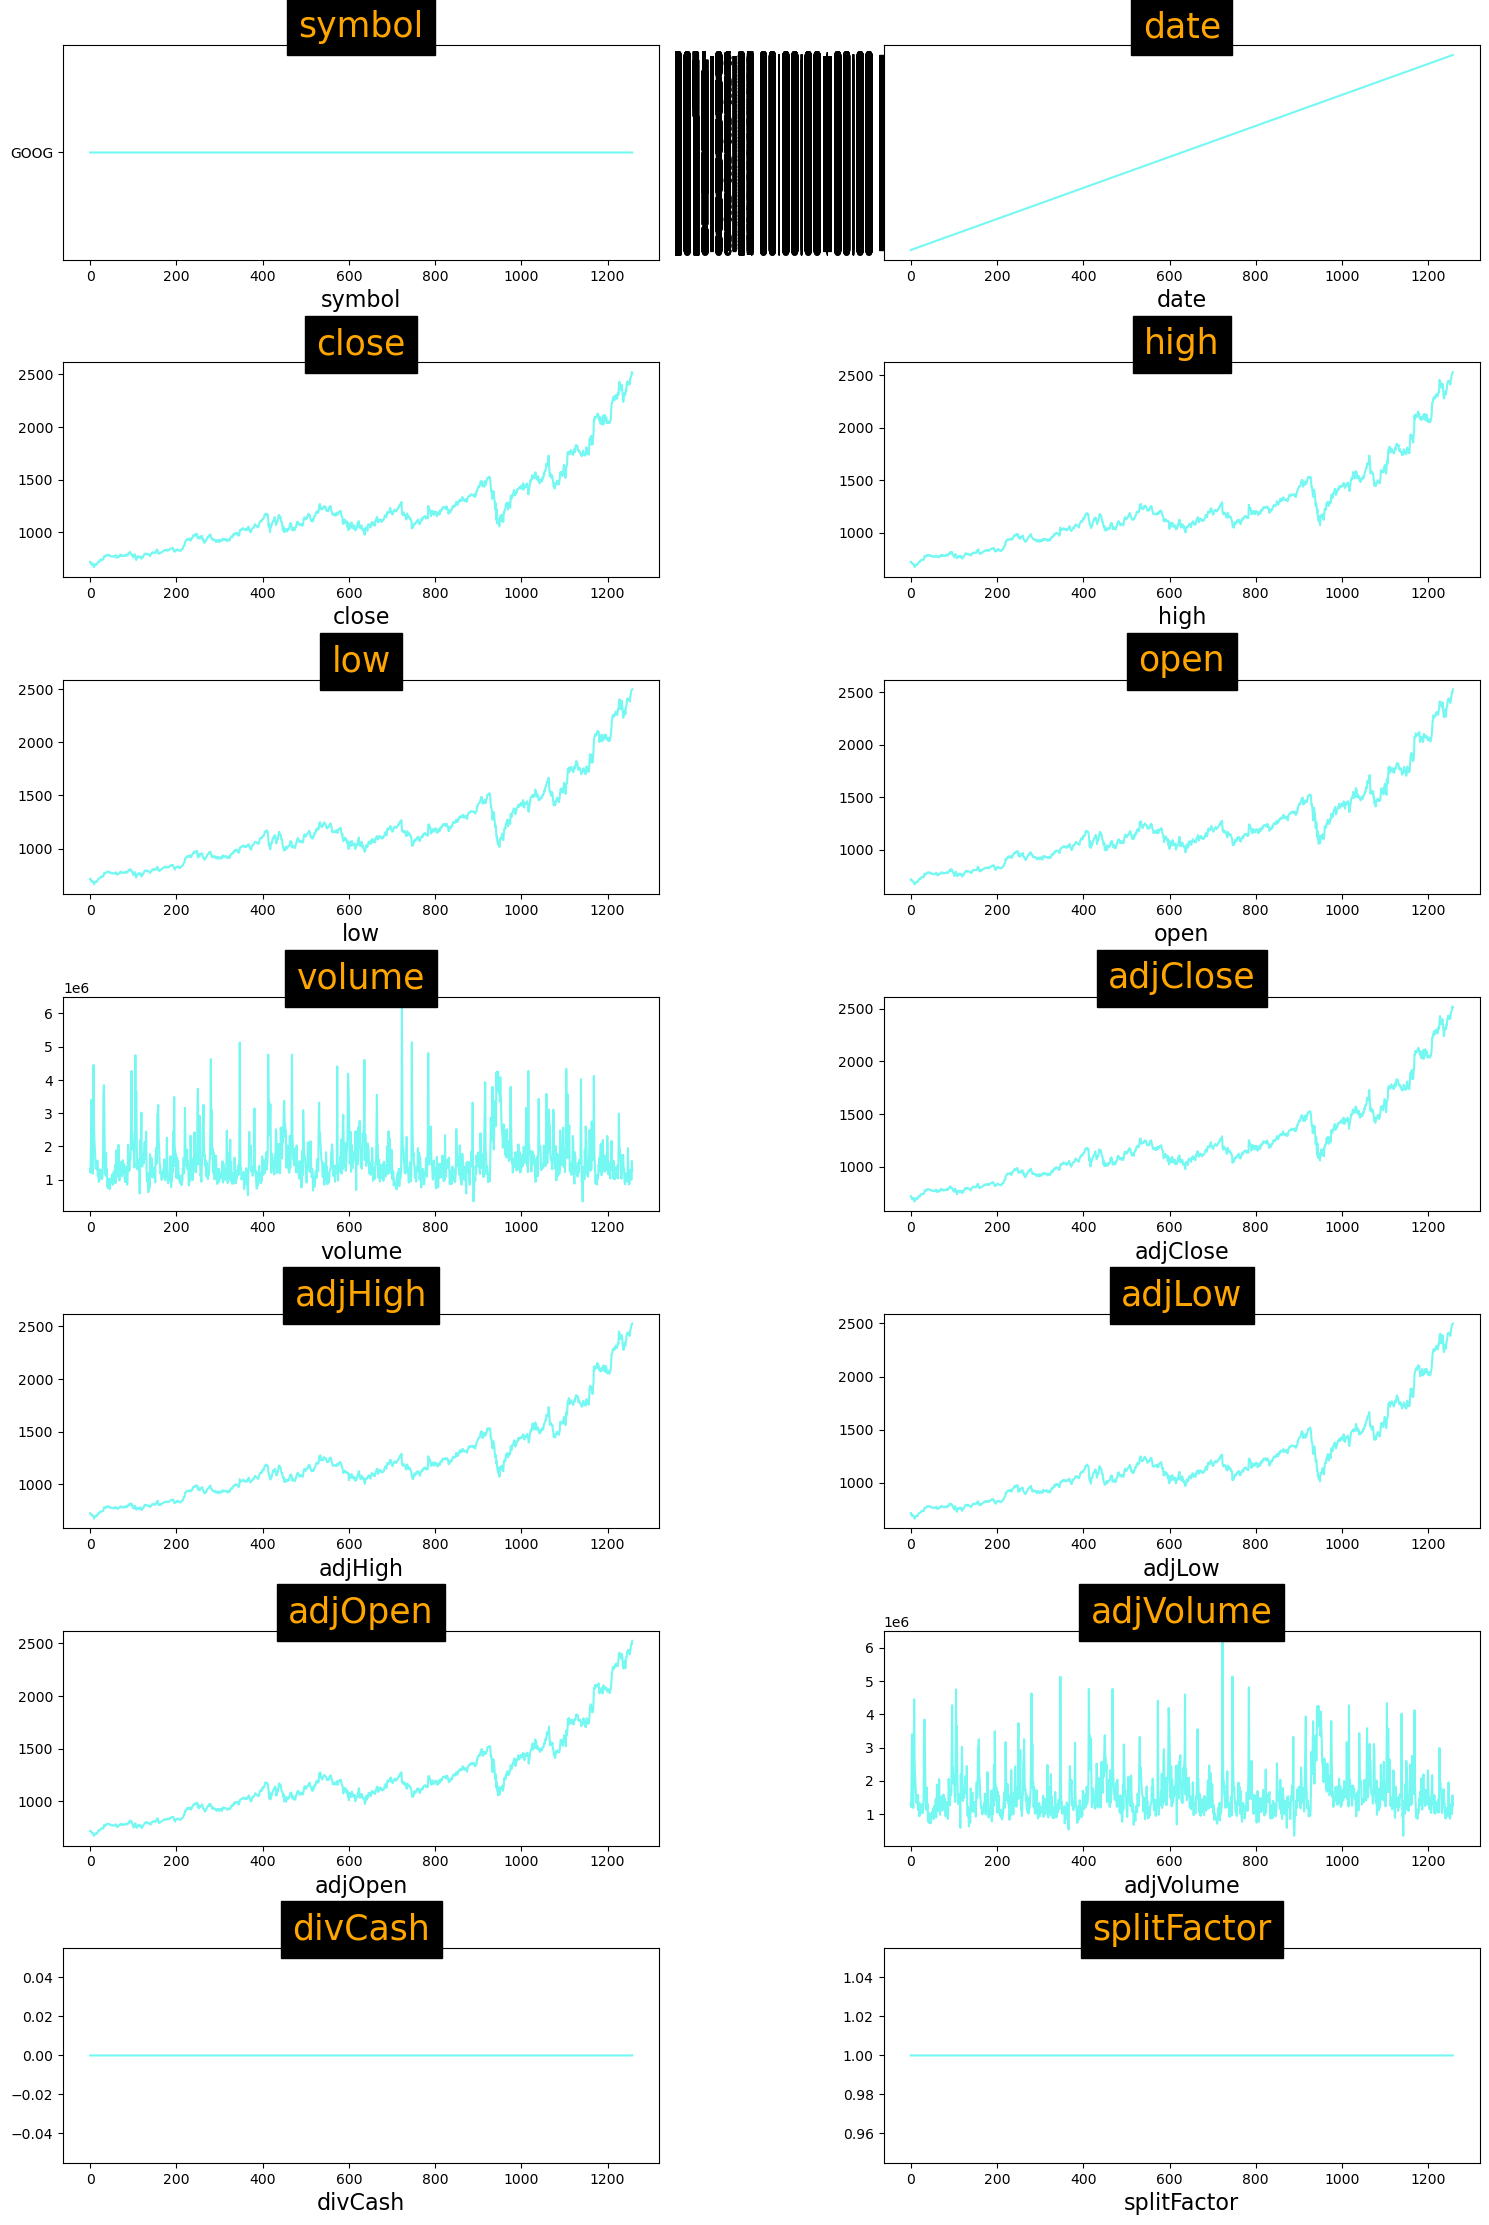

In [13]:
df1=stock_data
plt.figure(figsize = (15,25))
for idx, i in enumerate(df1):
    plt.subplot(8, 2, idx + 1)
    plt.plot(df1.index.values,df1[i], color='#75f8f2')
    plt.title(i,backgroundcolor='black',color='orange',fontsize=25)
    plt.xlabel(i, size = 16)
plt.tight_layout()                     
plt.show()

In [14]:
daily_changes = stock_data['close'].diff()
fig = px.histogram(daily_changes, nbins=50, title='Histogram of Daily Price Changes')
fig.update_xaxes(title='Daily Price Change')
fig.update_yaxes(title='Frequency')
fig.update_layout(template='plotly_dark')
fig.show()

In [15]:
stock_data['20-day MA'] = stock_data['close'].rolling(window=20).mean()

fig = go.Figure(data=[go.Candlestick(
    x=stock_data['date'],
    open=stock_data['open'],
    high=stock_data['high'],
    low=stock_data['low'],
    close=stock_data['close'],
    name="Candlesticks",
    increasing_line_color='green',
    decreasing_line_color='red',
    line=dict(width=1),
    showlegend=False
)])

fig.add_trace(go.Scatter(x=stock_data['date'], y=stock_data['20-day MA'], mode='lines', name='20-day Moving Average', line=dict(color='rgba(255, 255, 0, 0.3)')))

fig.update_layout(
    title="Google Stock Price Candlestick Chart with Moving Average",
    xaxis_title="Date",
    yaxis_title="Price",
    template="plotly_dark",
)

fig.show()

In [16]:
stock_data = stock_data.drop('20-day MA', axis=1)

## <span style="color: #d62d20">Data Preprocessing</span>

In [17]:
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data = stock_data.sort_values('date')

In [18]:
stock = stock_data[['date', 'close', 'high', 'low', 'open', 'volume']]

## <span style="color: #d62d20">Data Normalization</span>

In [33]:
# MOdel LSTM 2

# Normalaze Data For Create Trin and Test with new dataframe with only the 'Close' column 
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# fit scaler on only one column('close')
scaled = scaler.fit_transform(df2.filter(['close'])) 
# now have a scaled dataframe with 'colose column'
df3=pd.DataFrame(scaled, columns=['close'])
# Get describe horizontally with '.T'
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
close,1258.0,0.295713,0.206834,0.0,0.157846,0.250467,0.373561,1.0


In [34]:
# # MOdel LSTM 2

# Finding a Length of %80 from the number of rows to Create a train Dataset (using array)
new_dataset_length = int(np.ceil( len(df2.filter(['close']).values) * .8 )) 
print('Length of %80 of Dataset is ',new_dataset_length, 
      ' Therefore, the test data length is ',len(stock_data.close) - new_dataset_length)

Length of %80 of Dataset is  1007  Therefore, the test data length is  251


In [19]:
# Model LSTM 1
scaler = MinMaxScaler()
normalized_data = stock[['open', 'high', 'low', 'volume', 'close']].copy()
normalized_data = scaler.fit_transform(normalized_data)

## <span style="color: #d62d20">Data Splitting</span>

<span style="color: blue"></span> Split the normalized data into training and testing sets using `train_test_split`. The testing set size is set to 20% of the data, and `shuffle` is set to `False` to maintain the chronological order.

# Creating Train and Test from the column of 'close'

In [35]:
# # MOdel LSTM 2

# Create the training data set with 20 time steps 
# finding the best time step from MA that 20 was the most optimal

train = scaled[0:int(new_dataset_length), :]

time_step = 20

X_train = []
y_train = []

for i in range(time_step, len(train)):
    X_train.append(train[i-time_step:i, 0])
    y_train.append(train[i, 0])
    if i<= (time_step+1):
        print(X_train)
        print(y_train)
        print()

[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,
       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,
       0.00635609, 0.00855213, 0.01286326, 0.01669958, 0.01415283,
       0.0159226 , 0.01462225, 0.0201636 , 0.02526789, 0.02826249])]
[0.026287675224189844]

[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,
       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,
       0.00635609, 0.00855213, 0.01286326, 0.01669958, 0.01415283,
       0.0159226 , 0.01462225, 0.0201636 , 0.02526789, 0.02826249]), array([0.02733443, 0.02271575, 0.01265823, 0.01373196, 0.0149352 ,
       0.01575534, 0.01813483, 0.00375538, 0.        , 0.00635609,
       0.00855213, 0.01286326, 0.01669958, 0.01415283, 0.0159226 ,
       0.01462225, 0.0201636 , 0.02526789, 0.02826249, 0.02628768])]
[0.026287675224189844, 0.02842975384980634]



In [36]:
# # MOdel LSTM 2

# Converting the X_train and y_train to numpy arrays 
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshape the X_train 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# Creating the test dataset
test = scaled[new_dataset_length-time_step:, :]
# Creating DataSets of y_test
y_test =  np.array(scaler.inverse_transform(df3))[new_dataset_length:, :]
# Creating dataset of X_test
X_test = []
for i in range(time_step, len(test)):
    X_test.append(test[i-time_step:i, 0])
# Converting dataset to a numpy array
X_test = np.array(X_test)
y_test = np.array(y_test)
# Reshaping the data for learning in RNN model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))


In [20]:
train_data, test_data = train_test_split(normalized_data, test_size=0.2, shuffle=False)

In [21]:
train_df = pd.DataFrame(train_data, columns=['open', 'high', 'low', 'volume', 'close'])
test_df = pd.DataFrame(test_data, columns=['open', 'high', 'low', 'volume', 'close'])

## <span style="color: #d62d20">Sequence Generation</span>

In [22]:
def generate_sequences(df, seq_length=50):
    X = df[['open', 'high', 'low', 'volume', 'close']].reset_index(drop=True)
    y = df[['open', 'high', 'low', 'volume', 'close']].reset_index(drop=True)

    sequences = []
    labels = []

    for index in range(len(X) - seq_length + 1):
        sequences.append(X.iloc[index : index + seq_length].values)
        labels.append(y.iloc[index + seq_length - 1].values)

    sequences = np.array(sequences)
    labels = np.array(labels)

    return sequences, labels

# Creating Model by LSTM

In [23]:
train_sequences, train_labels = generate_sequences(train_df)
test_sequences, test_labels = generate_sequences(test_df)

## <span style="color: #d62d20">Model Architecture</span>

<span style="color: blue"> 1. </span> Create a Sequential model.

<span style="color: blue">2.</span> Add the first LSTM layer with 50 units and return sequences. The input shape is set to (50, 5), where 50 is the sequence length and 5 is the number of features ('open', 'high', 'low', 'volume', 'close').
   - **LSTM Layer 1:**
      - Units: 50
      - Input Shape: (50, 5)
      - Return Sequences: True

<span style="color: blue">3.</span> Apply dropout regularization with a rate of 0.2 to mitigate overfitting.
   - **Dropout Layer 1:**
      - Rate: 0.2

<span style="color: blue">4.</span> Add the second LSTM layer with 50 units and return sequences.
   - **LSTM Layer 2:**
      - Units: 50
      - Return Sequences: True

<span style="color: blue">5.</span> Apply dropout regularization with a rate of 0.2.
   - **Dropout Layer 2:**
      - Rate: 0.2

<span style="color: blue">6.</span> Add the third LSTM layer with 50 units.
   - **LSTM Layer 3:**
      - Units: 50

<span style="color: blue">7.</span> Apply dropout regularization with a rate of 0.2.
   - **Dropout Layer 3:**
      - Rate: 0.2

<span style="color: blue">8.</span> Add a fully connected Dense layer with 5 units as the output layer.
   - **Dense Layer:**
      - Units: 5 (output)

This model architecture comprises multiple LSTM layers with dropout regularization to prevent overfitting.


In [24]:
model = Sequential([
    # First LSTM layer with 50 units, returning sequences for next layer input
    LSTM(units=50, return_sequences=True, input_shape=(50, 5)),
    Dropout(0.2),
    # Second LSTM layer with 50 units, returning sequences
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    # Third LSTM layer with 50 units
    LSTM(units=50),
    Dropout(0.2),
    # Dense layer with 5 units as output
    Dense(units=5)
])


C:\Users\islam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [37]:
# Creat RNN
RNN1 = tf.keras.models.Sequential()
# The First LSTM Layer
RNN1.add(tf.keras.layers.LSTM(units=130, return_sequences=True, input_shape=(X_train.shape[1],1)))
# The Second LSTM Layer
RNN1.add(tf.keras.layers.LSTM(units=65, return_sequences=False))
# The Connection
RNN1.add(tf.keras.layers.Dense(units=30))
# The Output layer
RNN1.add(tf.keras.layers.Dense(units=1))
# Compiling The RNN
RNN1.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
# Fitting Model on The Train and Validation Dataset
Model_1 = RNN1.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)


Epoch 1/10


C:\Users\islam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.0000e+00 - loss: 0.0105 - val_accuracy: 0.0000e+00 - val_loss: 3478089.2500
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.0000e+00 - loss: 5.5107e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477866.5000
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0000e+00 - loss: 4.1158e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477871.2500
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0000e+00 - loss: 3.7356e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477857.5000
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.0000e+00 - loss: 4.0602e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477812.0000
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.0000e+00 - loss: 3.5202e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477856.5000
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0000e+00 - loss: 3.8456e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477835.0000


## <span style="color: #d62d20">Compile and Summary</span>

<span style="color: blue">1.</span> Compile the model for training using the mean squared error as the loss function and the Adam optimizer. Additionally, track the mean absolute error as a metric.
   - **Loss Function:** Mean Squared Error
   - **Optimizer:** Adam
   - **Metrics:** Mean Absolute Error

<span style="color: blue">2.</span> Display a summary of the model's architecture and parameters.


In [25]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             255 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,855 (202.56 KB)

 Trainable params: 51,855 (202.56 KB)

 Non-trainable params: 0 (0.00 B)

## <span style="color: #d62d20">Model Training</span>

<span style="color: blue"> 1. </span> Set the number of training epochs to 200 and the batch size to 32 for training the model.

<span style="color: blue">2.</span> Train the model using the training sequences and labels. During training, the model will run for the specified number of epochs, updating its weights to minimize the loss.
   - **Number of Epochs:** 200
   - **Batch Size:** 32
   - **Training Data:** `train_sequences` and `train_labels`
   - **Validation Data:** `test_sequences` and `test_labels`
   - **Verbose:** Display training progress information.


In [26]:
epochs = 200
batch_size = 32

history = model.fit(
    train_sequences,
    train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(test_sequences, test_labels),
    verbose=1
)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - loss: 0.0202 - mean_absolute_error: 0.1055 - val_loss: 0.0301 - val_mean_absolute_error: 0.1505
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0050 - mean_absolute_error: 0.0461 - val_loss: 0.0200 - val_mean_absolute_error: 0.1176
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0049 - mean_absolute_error: 0.0428 - val_loss: 0.0206 - val_mean_absolute_error: 0.1205
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0036 - mean_absolute_error: 0.0396 - val_loss: 0.0089 - val_mean_absolute_error: 0.0743
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0044 - mean_absolute_error: 0.0417 - val_loss: 0.0155 - val_mean_absolute_error: 0.1072
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0048 - mean_absolute_error: 0.0416 - val_loss: 0.0143 - val_mean_absolute_error: 0.1001
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0035 - mean_absolute_error: 0.0370 -

Epoch 45/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 7.0076e-04 - mean_absolute_error: 0.0187 - val_loss: 0.0011 - val_mean_absolute_error: 0.0231
Epoch 46/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 6.4211e-04 - mean_absolute_error: 0.0175 - val_loss: 0.0022 - val_mean_absolute_error: 0.0372
Epoch 47/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 6.2912e-04 - mean_absolute_error: 0.0174 - val_loss: 8.3527e-04 - val_mean_absolute_error: 0.0203
Epoch 48/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 6.5580e-04 - mean_absolute_error: 0.0185 - val_loss: 0.0029 - val_mean_absolute_error: 0.0439
Epoch 49/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 5.8372e-04 - mean_absolute_error: 0.0164 - val_loss: 8.6787e-04 - val_mean_absolute_error: 0.0206
Epoch 50/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 5.7063e-04 - mean_absolute_error: 0.0169 - val_loss: 0.0011 - val_mean_absolute_error: 0.0233
Epoch 51/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 5

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 3.9316e-04 - mean_absolute_error: 0.0138 - val_loss: 0.0016 - val_mean_absolute_error: 0.0328
Epoch 89/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 3.6718e-04 - mean_absolute_error: 0.0135 - val_loss: 0.0017 - val_mean_absolute_error: 0.0331
Epoch 90/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 3.3419e-04 - mean_absolute_error: 0.0131 - val_loss: 0.0014 - val_mean_absolute_error: 0.0308
Epoch 91/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 3.5733e-04 - mean_absolute_error: 0.0132 - val_loss: 0.0013 - val_mean_absolute_error: 0.0285
Epoch 92/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 3.4391e-04 - mean_absolute_error: 0.0131 - val_loss: 0.0012 - val_mean_absolute_error: 0.0268
Epoch 93/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 3.2210e-04 - mean_absolute_error: 0.0127 - val_loss: 6.1259e-04 - val_mean_absolute_error: 0.0184
Epoch 94/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 3.6960e-04 - mean_

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 3.0682e-04 - mean_absolute_error: 0.0129 - val_loss: 2.7485e-04 - val_mean_absolute_error: 0.0122
Epoch 131/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 3.2395e-04 - mean_absolute_error: 0.0128 - val_loss: 3.8686e-04 - val_mean_absolute_error: 0.0149
Epoch 132/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 3.3456e-04 - mean_absolute_error: 0.0129 - val_loss: 1.7670e-04 - val_mean_absolute_error: 0.0096
Epoch 133/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 2.3266e-04 - mean_absolute_error: 0.0110 - val_loss: 2.8316e-04 - val_mean_absolute_error: 0.0122
Epoch 134/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.9187e-04 - mean_absolute_error: 0.0117 - val_loss: 2.1899e-04 - val_mean_absolute_error: 0.0110
Epoch 135/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 2.5682e-04 - mean_absolute_error: 0.0115 - val_loss: 4.6895e-04 - val_mean_absolute_error: 0.0172
Epoch 136/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step 

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 2.9459e-04 - mean_absolute_error: 0.0120 - val_loss: 1.3875e-04 - val_mean_absolute_error: 0.0089
Epoch 173/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 2.7621e-04 - mean_absolute_error: 0.0120 - val_loss: 1.5967e-04 - val_mean_absolute_error: 0.0096
Epoch 174/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 2.4257e-04 - mean_absolute_error: 0.0108 - val_loss: 1.2722e-04 - val_mean_absolute_error: 0.0086
Epoch 175/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 2.4053e-04 - mean_absolute_error: 0.0109 - val_loss: 2.1265e-04 - val_mean_absolute_error: 0.0112
Epoch 176/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 2.3636e-04 - mean_absolute_error: 0.0106 - val_loss: 4.6005e-04 - val_mean_absolute_error: 0.0180
Epoch 177/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 2.4911e-04 - mean_absolute_error: 0.0112 - val_loss: 1.8498e-04 - val_mean_absolute_error: 0.0105
Epoch 178/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step 

In [27]:
train_predictions = model.predict(train_sequences)
test_predictions = model.predict(test_sequences)

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [38]:
# Geting The Model Predicted Price Values 
predictions1 = RNN1.predict(X_test)
# Converting scaled number to actual number
predictions1 = scaler.inverse_transform(predictions1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


## <span style="color: #d62d20">Training Data Predictions</span>

In [40]:
import plotly.graph_objects as go
import plotly.io as pio
.# MOdel LSTM 2
# Change of style
pio.templates.default = "seaborn"

# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['Predictions1'] = predictions1

# Visualizing the data
fig = go.Figure()
fig.add_trace(go.Scatter(x=df1['date'].iloc[:1007], y=train['close'], name='Train'))
fig.add_trace(go.Scatter(x=df1['date'].iloc[1007:], y=valid['close'], name='Val'))
fig.add_trace(go.Scatter(x=df1['date'].iloc[1007:], y=valid['Predictions1'], name='Predictions'))

fig.update_layout(title='Model_1 by LSTM',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  legend_title='Legend',
                  width=1000, height=600,
                  font=dict(size=18))

fig.show()

In [28]:
fig = make_subplots(rows=1, cols=1, subplot_titles=('Close Predictions'))

train_close_pred = train_predictions[:, 0]
train_close_actual = train_labels[:, 0]

fig.add_trace(go.Scatter(x=np.arange(len(train_close_actual)), y=train_close_actual, mode='lines', name='Actual', opacity=0.9))
fig.add_trace(go.Scatter(x=np.arange(len(train_close_pred)), y=train_close_pred, mode='lines', name='Predicted', opacity=0.6))

fig.update_layout(title='Close Predictions on Train Data', template='plotly_dark')
fig.show()

### <span style="color: #d62d20">Evaluation Model </span>


In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
train_predictions = model.predict(train_sequences)
test_predictions = model.predict(test_sequences)

# Extract close predictions and actual values
train_close_pred = train_predictions[:, 0]
train_close_actual = train_labels[:, 0]
test_close_pred = test_predictions[:, 0]
test_close_actual = test_labels[:, 0]

# Calculate performance metrics for train data
train_mse = mean_squared_error(train_close_actual, train_close_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(train_close_actual, train_close_pred)
train_r2 = r2_score(train_close_actual, train_close_pred)
train_adj_r2 = 1 - (1 - train_r2) * (len(train_close_actual) - 1) / (len(train_close_actual) - len(train_close_pred) - 1)

print("Train Data Performance Metrics:")
print(f"MSE: {train_mse:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"MAE: {train_mae:.2f}")
print(f"R2: {train_r2:.2f}")
print(f"Adjusted R2: {train_adj_r2:.2f}")

# Calculate performance metrics for test data
test_mse = mean_squared_error(test_close_actual, test_close_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(test_close_actual, test_close_pred)
test_r2 = r2_score(test_close_actual, test_close_pred)
test_adj_r2 = 1 - (1 - test_r2) * (len(test_close_actual) - 1) / (len(test_close_actual) - test_close_pred.shape[0] - 1)

print("\nTest Data Performance Metrics:")
print(f"MSE: {test_mse:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE: {test_mae:.2f}")
print(f"R2: {test_r2:.2f}")
print(f"Adjusted R2: {test_adj_r2:.2f}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Train Data Performance Metrics:
MSE: 0.00
RMSE: 0.01
MAE: 0.01
R2: 1.00
Adjusted R2: 5.03

Test Data Performance Metrics:
MSE: 0.00
RMSE: 0.01
MAE: 0.01
R2: 0.99
Adjusted R2: 2.32


In [39]:
# # MOdel LSTM 2

# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions1)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions1)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions1))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions1)}')

Mean Absolute Error: 94.80450220601968
Mean Squared Error: 12332.966045732886
Root Mean Squared Error: 111.05388802618702
R2_Score: 0.8824428741269649


### <span style="color: #d62d20">Next 10 Days Predictions</span>

<span style="color: blue">1.</span> Initialize an empty list `latest_prediction` to store the model's predictions.

<span style="color: blue">2.</span> Extract the last sequence of the test data using `test_sequences[:-1]`.

<span style="color: blue">3.</span> Loop 10 times to predict the next values. In each iteration, predict the next sequence using the model and append the prediction to `latest_prediction`.

In [30]:
latest_prediction = []
last_seq = test_sequences[:-1]

for _ in range(10):
    prediction = model.predict(last_seq)
    latest_prediction.append(prediction)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [31]:
pi.templates.default = "plotly_dark"

predicted_data_next = np.array(latest_prediction).reshape(-1, 5)
last_date = stock['date'].max()
next_10_days = [last_date + timedelta(days=i) for i in range(1, 11)]

for i, feature_name in enumerate(['open', 'high', 'low', 'volume', 'close']):
    if feature_name in ['volume', 'close']:
        fig = go.Figure()

        fig.add_trace(go.Scatter(x=next_10_days, y=predicted_data_next[:, i],
                                 mode='lines+markers', name=f'Predicted {feature_name.capitalize()} Prices'))

        fig.update_layout(title=f'Predicted {feature_name.capitalize()} Prices for the Next 10 Days',
                          xaxis_title='Date', yaxis_title=f'{feature_name.capitalize()} Price')

        fig.show()

# Create Models of RNN base on LSTM, GRU, Bidirectional

# Creating Model by GRU

In [41]:
# Creat RNN
RNN2 = tf.keras.models.Sequential()
# The First GRU Layer
RNN2.add(tf.keras.layers.GRU(units=130, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
# The Second GRU Layer
RNN2.add(tf.keras.layers.GRU(units=65, return_sequences=False, activation='tanh'))
# The Connection
RNN2.add(tf.keras.layers.Dense(units=30))
# The Output layer
RNN2.add(tf.keras.layers.Dense(units=1))
# Compiling The RNN
RNN2.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
# Compiling The RNN
RNN2.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
# Fitting Model on The Train and Validation Dataset
Model_2 = RNN2.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)


Epoch 1/10


C:\Users\islam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.0000e+00 - loss: 0.0150 - val_accuracy: 0.0000e+00 - val_loss: 3478199.5000
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0000e+00 - loss: 6.9226e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477764.7500
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0000e+00 - loss: 2.0112e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477849.2500
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0000e+00 - loss: 1.9068e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477833.5000
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.0000e+00 - loss: 1.7133e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477815.0000
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.0000e+00 - loss: 1.8156e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477872.5000
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0000e+00 - loss: 1.9527e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477829.0000


In [42]:
# Geting The Model Predicted Price Values 
predictions2 = RNN2.predict(X_test)
# Converting scaled number to actual number
predictions2 = scaler.inverse_transform(predictions2)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


In [43]:
# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions2)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions2)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions2))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions2)}')

Mean Absolute Error: 30.220990257719127
Mean Squared Error: 1614.1177860580656
Root Mean Squared Error: 40.176084752724044
R2_Score: 0.9846143217255361


In [44]:
import plotly.graph_objects as go

# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['Predictions2'] = predictions2

# Visualizing the data
fig = go.Figure()
fig.add_trace(go.Scatter(x=df1['date'].iloc[:1007], y=train['close'], name='Train'))
fig.add_trace(go.Scatter(x=df1['date'].iloc[1007:], y=valid['close'], name='Val'))
fig.add_trace(go.Scatter(x=df1['date'].iloc[1007:], y=valid['Predictions2'], name='Predictions'))

fig.update_layout(title='Model_2 by GRU',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  legend_title='Legend')

fig.show()

# Creating Model by LSTM & Bidirectional

In [45]:
# Creat RNN
RNN3 = tf.keras.models.Sequential()
# The First Bidirectional & LSTM  Layer
RNN3.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=130, return_sequences=True, input_shape=(X_train.shape[1],1))))
# The Second Bidirectional & LSTM Layer
RNN3.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=65, return_sequences=False)))
# The Connection
RNN3.add(tf.keras.layers.Dense(units=30))
# The Output layer
RNN3.add(tf.keras.layers.Dense(units=1))
# Compiling The RNN
RNN3.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
# Fitting Model on The Train and Validation Dataset
Model_3 = RNN2.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)


Epoch 1/10
 4/31 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 1.8845e-04

C:\Users\islam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.0000e+00 - loss: 1.6189e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477806.2500
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0000e+00 - loss: 1.6786e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477801.2500
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0000e+00 - loss: 1.5357e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477790.2500
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0000e+00 - loss: 1.5221e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477814.5000
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0000e+00 - loss: 1.3928e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477821.0000
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.0000e+00 - loss: 1.3266e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477818.7500
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0000e+00 - loss: 1.4020e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477833.0

In [46]:
# Geting The Models Predicted Price Values 
predictions3 = RNN3.predict(X_test)
# Converting scaled number to actual number
predictions3 = scaler.inverse_transform(predictions3)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step


In [47]:
# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions3)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions3)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions3))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions3)}')

Mean Absolute Error: 1239.05274949032
Mean Squared Error: 1649791.6404957043
Root Mean Squared Error: 1284.442151478884
R2_Score: -14.725719411441833


In [48]:
import plotly.graph_objects as go

# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['Predictions3'] = predictions3

# Visualizing the data
fig = go.Figure()
fig.add_trace(go.Scatter(x=df1['date'].iloc[:1007], y=train['close'], name='Train'))
fig.add_trace(go.Scatter(x=df1['date'].iloc[1007:], y=valid['close'], name='Val'))
fig.add_trace(go.Scatter(x=df1['date'].iloc[1007:], y=valid['Predictions3'], name='Predictions'))

fig.update_layout(title='Model_3 by LSTM & Bidirectional',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  legend_title='Legend',
                  width=1000, height=600)

fig.show()

# Creating Model by LSTM & GRU

In [49]:
# Creat RNN
RNN4 = tf.keras.models.Sequential()
# The First Layer of LSTM 
RNN4.add(tf.keras.layers.LSTM(units=130, return_sequences=True, input_shape=(X_train.shape[1],1)))
# The Second Layer of GRU 
RNN4.add(tf.keras.layers.GRU(units=65, return_sequences=False, activation='tanh'))
# The Connection
RNN4.add(tf.keras.layers.Dense(units=30))
# The Output layer
RNN4.add(tf.keras.layers.Dense(units=1))
# Compiling The RNN
RNN4.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
# Fitting Model on The Train and Validation Dataset
Model_4 = RNN4.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=10)

C:\Users\islam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.0000e+00 - loss: 0.0116 - val_accuracy: 0.0000e+00 - val_loss: 3478051.2500
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0000e+00 - loss: 5.2662e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477776.7500
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0000e+00 - loss: 2.9740e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477821.5000
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0000e+00 - loss: 2.8445e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477812.0000
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0000e+00 - loss: 3.2296e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477790.0000
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0000e+00 - loss: 3.1380e-04 - val_accuracy: 0.0000e+00 - val_loss: 3477800.7500
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0000e+00 - loss: 2.5738e-04 - val_accuracy: 0.0000e+00 - val_loss: 34

In [50]:
# Geting The Models Predicted Price Values 
predictions4 = RNN4.predict(X_test)
# Converting scaled number to actual number
predictions4 = scaler.inverse_transform(predictions4)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


In [51]:
# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions4)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions4)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions4))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions4)}')

Mean Absolute Error: 42.4163720119522
Mean Squared Error: 3119.0842711974205
Root Mean Squared Error: 55.84876248581897
R2_Score: 0.970269067398866


In [52]:
import plotly.graph_objects as go

# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['Predictions4'] = predictions4

# Visualizing the data
fig = go.Figure()
fig.add_trace(go.Scatter(x=df1['date'].iloc[:1007], y=train['close'], name='Train'))
fig.add_trace(go.Scatter(x=df1['date'].iloc[1007:], y=valid['close'], name='Val'))
fig.add_trace(go.Scatter(x=df1['date'].iloc[1007:], y=valid['Predictions4'], name='Predictions'))

fig.update_layout(title='Model_4 by LSTM & GRU ',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  legend_title='Legend',
                  width=1000, height=600,
                  font=dict(size=18))

fig.show()

In [53]:
# Save all of Models for WebApp or other predictions
joblib.dump(Model_1, 'model1')
joblib.dump(Model_2, 'model2') # The best model
joblib.dump(Model_4, 'model4')

['model4']